# Datenexploration
Zunächst werden die Trainings- und Testdaten, die sich in unseren CSV-Dateien befinden, visualisiert. Dadurch können bereits Auffälligkeiten im Datensatz erkannt werden.

### Einführung in die benötigten Bibliotheken
Zuerst müssen die benötigten Bibliotheken importiert werden. Diese werden im folgenden kurz vorgestellt:

##### NumPy
NumPy ist eine Bibliothek für Lineare Algebra. Sie ist im Bereich Data Science enorm wichtig, da fast alle Libraries im PyData Ökosystem auf NumPy zurückgreifen. Innerhalb unserer Anaconda Python Distribution ist NumPy bereits vorinstalliert. Für tiefergehende Informationen nutzen Sie bitte die offizielle [Dokumentation von NumPy.](https://docs.scipy.org/doc/numpy/)

##### Pandas
Pandas ist ebenfalls eine Bibliothek für Python mit der Hilfsmittel zur Verwaltung und Analyse von Daten bereitstellt. Es stellt Datenstrukturen und Operatoren bereit um den Zugriff auf numerische Tabellen und Zeitreihen zu vereinfachen. Weitere Infos in der [Dokumentation von Pandas.](https://pandas.pydata.org/pandas-docs/stable/)

##### Matplotlib
Matplotlib wurde vor dem Hintergrund geschaffen, die Möglichkeiten, die die Programmiersprache MatLab zur Visualisierung bietet, in Python umzusetzen. Es lassen sich wissenschaftliche Diagramme in 2D und 3D erstellen. 

Vorteile von Matplotlib:
* einfache Erstellung von Plots
* sehr anpassbar
* Output in hoher Qualität und in vielen verschiedenen Formaten

Weitere Infos in der [Dokumentation von Matplotlib.](https://matplotlib.org/)

##### Seaborn
Seaborn ist eine Bbiliothek zur Erstellung von statistischen Diagrammen. Es baut auf Matplotlib auf und ist eng mit den Pandas Datenstrukturen verknüpft.
Weitere Infos in der [Dokumentation von Seaborn](https://seaborn.pydata.org/)

##### Microsoft Azure Machine Learning Python client library for Azure ML Studio
Die Bibliothek ermöglicht es auf die Azure ML Studio-Datasets von Ihrer lokalen Python-Umgebung aus zuzugreifen. Dadurch können Datasets heruntergeladen werden, die im ML Studio Workspace verfügbar sind. Optional können die Daten in ein Pandas Data Frame konvertiert werden. [Dokumentation von AzureML Client Library](https://github.com/Azure/Azure-MachineLearning-ClientLibrary-Python)


### Importieren der benötigten Bibliotheken
Es werden die oben vorgestellten Bibliotheken importiert. Der Ausdruck **%matplotlib inline** ist eine ["Magic Function"](https://ipython.readthedocs.io/en/stable/interactive/tutorial.html#magics-explained) in IPython. Dadurch wird ermöglicht, dass die Plot-Ausgaben im Notebook angezeigt und gespeichert werden.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from azureml import Workspace
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Importieren der Trainings- und Testdaten

Wenn Sie im Azure ML-Studio arbeiten oder Datasets von dort verwenden, müssen Sie sich einen Data Access Code im ML-Studio erstellen lassen und diesen in das Notebook einbinden. Wenn das Notebook lokal läuft und Sie die Datensätze von Ihrem Rechner aus einbinden, stellt Pandas die Funktion ["panda.read_csv()"](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) bereit, die es ermöglicht, CSV-Dateien als Data Frame einzulesen. Es muss lediglich der Pfad zur Datei angegeben werden. 

Über ["DataFrame.head()"](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html) können die obersten Reihen des Data Frames angezeigt werden (standardmäßig die obersten 5). Damit können wir prüfen, ob die CSV-Datei korrekt eingelesen wurde und wir erkennen die Struktur unserer Daten.


**Aufgabe 1:** *Importieren sie die Trainingsdaten aus der CSV-Datei "anomaly_train.csv" unter dem Namen "df_train" und lassen Sie sich die obersten Reihen des Datensatzes anzeigen.
Verfahren Sie im Anschluss nach dem selben Muster mit den Testdaten ("df_test")*

Trainingsdaten

Testdaten

### Deskriptive Statistiken
Als erstes lassen wir uns mit Hilfe von ["DataFrame.describe()"](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html) deskriptive Statistiken ausgeben, die die Datensätze näher beschreiben.

**Aufgabe 2:** Lassen Sie sich für die Trainings- und Testdaten die deskriptiven Statistiken anzeigen.

In [6]:
df_train.describe()

,ID,Rotor speed,Gear Temp.,Generator rotation,Env. Temp.,Output,Voltage,Windspeed
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,2000.500000,24.917768,65.602625,1820.469250,7.458750,338.813750,400.017610,25.822210
std,1154.844867,5.897408,3.005754,1007.255333,2.305022,29.431771,2.299802,11.343849
min,1.000000,10.110000,59.100000,501.000000,0.000000,300.000000,396.000000,1.030000
25%,1000.750000,20.107500,63.100000,1012.750000,6.000000,315.000000,398.030000,16.602500
50%,2000.500000,24.055000,65.600000,1605.500000,8.000000,333.000000,400.050000,22.700000
75%,3000.250000,29.972500,68.100000,2404.250000,9.000000,355.000000,402.050000,36.192500
max,4000.000000,40.270000,72.100000,5507.000000,10.000000,450.000000,404.000000,51.790000


In [7]:
df_test.describe()

,ID,Rotor speed,Gear Temp.,Generator rotation,Env. Temp.,Output,Voltage,Windspeed
count,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000
mean,180.500000,21.792389,65.698056,1486.502778,7.552778,329.986111,399.989861,19.975194
std,104.067286,2.987897,3.571377,599.530847,2.123615,18.417847,2.357538,4.463647
min,1.000000,14.000000,55.000000,500.000000,1.000000,300.000000,393.280000,11.700000
25%,90.750000,19.790000,63.275000,1036.500000,6.000000,314.000000,398.127500,15.882500
50%,180.500000,21.845000,65.450000,1437.500000,8.000000,330.000000,399.890000,20.770000
75%,270.250000,24.155000,68.100000,1879.500000,9.000000,343.000000,402.015000,24.155000
max,360.000000,27.800000,85.200000,3000.000000,10.000000,375.000000,403.980000,26.590000


### Überprüfen auf Null-Werte
Datensets sind nicht immer vollständig. Sie enthalten oft ungewollte Missing Values. Pandas Dataframe liefern eine eingebaute Methode [isnull()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.isnull.html) die für jeden Wert im Dataframe True/False zurückgibt.

Da wir aber nicht ein Dataframe mit True und False Werten geliefert bekommen wollen, nutzen wir zusätzlich die sum()-Funktion. Dadurch werden die True-Werte je Spalte aufsummiert.

**Aufgabe 3:** Lassen Sie sich die Anzahl fehlender Werte für die beiden Datensätze jeweils ausgeben.

Trainingsdaten

Testdaten

### Ausschließen der Spalte ID
Es fällt auf, dass es eine Spalte "ID" gibt, die wir natürlich nicht in die Visualisierung oder unser Modell mit einfließen lassen wollen. Über den nachfolgenden Befehl wird diese Spalte aus dem Datensatz ausgeschlossen. Lassen wir uns wieder die Top-5 Elemente anzeigen, sehen wir, dass die Spalte erfolgreich entfernt wurde.

In [10]:
df_train = df_train[df_train.columns[1:8]]
df_train.head()

,Rotor speed,Gear Temp.,Generator rotation,Env. Temp.,Output,Voltage,Windspeed
0,18.40,63.3,768,9,307,400.09,7.47
1,18.30,68.7,1142,7,307,396.34,7.32
2,18.97,68.4,800,5,302,396.41,8.15
3,14.95,67.8,590,9,313,397.62,7.44
4,15.65,60.8,736,6,322,401.58,7.61


In [11]:
df_test = df_test[df_test.columns[1:8]]

### Korrelationen zwischen den Variablen prüfen 
Als nächstes prüfen wir, ob zwischen den Variablen Korrelationen auftreten. Dazu nutzen wir die [corr()-Funktion](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) aus der Pandas Library, um die paarweise Korrelation der Spalten zu berechnen. Standardmäßig wird der Pearson Korrelationskoeffizient verwendet. Da dieser aber eine annähernde Normalverteilung der Variablen und einen linearen Zusammenhang zwischen diesen voraussetzt, nutzen wir die Spearman-Korrelation.

Referenzen:
* [Vergleich von Pearson und Spearman](https://www.statistik-und-beratung.de/2013/05/analyse-von-zusammenhangen-korrelation/)

**Aufgabe 4:** Untersuchen Sie, ob zwischen den Variablen des Trainingsdatensatzes Korrelationen bestehen. Standardmäßig wird der Pearson-Koeffizient berechnet. Nutzen Sie die verlinkte Dokumentation, um entsprechende Anpassungen vorzunehmen. Speichern Sie das Ergebnis als Variable "corr" für den nächsten Schritt.

Anzeigen von "corr""

Um den Output der Korrelation zu visualisieren, bietet sich eine Heatmap an.

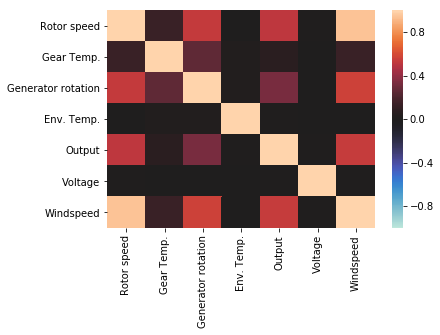

In [13]:
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            vmin = -1.0, vmax = 1.0, center = 0
           )
plt.show()

Wir erkennen, dass besonders zwischen "Rotor Speed" und "Windspeed" eine starke Korrelation besteht. Zwischen anderen Variablen bestehene teilweise Zusammenhänge und andere weisen kaum Zusammenhänge auf. 

#### Pairplot zur Abbildung von Korrelationen zwischen Variablen
Zur Darstellung des Pairplot nutzen wir ["seaborn.pairplot()"](https://seaborn.pydata.org/generated/seaborn.pairplot.html). Auf der Diagonalen werden die Histogramme der jeweiligen Variablen abgebildet. Ansonsten werden jeweils zwei Variablen gegenübergestellt.

**Aufgabe 5:** Erstellen Sie zwei Pairplots um die Zusammenhänge zwischen zwei Variablen darzustellen (sowohl für die Trainings- als auch die Testdaten). Sie können die Standardeigenschaften des Seaborn-Pairplots verwenden.

Trainingsdaten

Testdaten

### Liniendiagramm zur Abbildung der Zeitreihen
Da es sich bei den Daten um Zeitreihen handelt, stellen wir die beiden Data Frames im nächsten Schritt als Liniendiagramme dar. Da Pandas ebenfalls Möglichkeiten zur Datenvisualisierung mitliefert und diese für diesen Zweck ausreichend sind, nutzen wir ["DataFrame.plot()"](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html), um die Liniendiagramme zu erstellen.

**Aufgabe 6:** Erstellen Sie zwei Liniendiagramme (Trainings- und Testdaten), die die logarithmierten Daten in einem gemeinsamen Plot abbilden. Nutzen Sie dazu die in Pandas bereitgestellte Möglichkeit zur Datenvisualisierung: ["DataFrame.plot()"](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html).
Folgende Eigenschaften sollen bei der Erstellung des Diagramms beachtet werden:
* Logarithmische Skalierung der Daten und Darstellung aller Variablen in einem Diagramm
* Linienstärke = 1
* Diagrammgröße: 20x8 inch
* Legende einblenden
* Diagrammtitel: "Line Chart - Train Data (bzw. Test Data)"


Trainingsdaten

Testdaten

# Datenanalyse
Nachdem wir im ersten Schritt die Daten visualisiert haben, geht es im nächsten Schritt darum eine Anomalieerkennung mit Hilfe einer One-Class-SVM zu implementieren. 

## Wiederholung: One-Class Support Vector Machine
Wir nutzen eine **One-Class-SVM** zur Erkennung von Anomalien. Bei einer Support Vector Machine (SVM) handelt es sich um ein Klassifikationsverfahren aus der statistischen Lerntheorie. Objekte sollen mittels einer Hyperebene so voneinander getrennt werden, dass der Grenzbereich zwischen dem Objekten möglich berit und frei von anderen Objekten ist.

Die One-Class SVM ist ein Spezialfall der SVM, bei der lediglich zwei Klassen betrachtet:
* Trainingsdaten bilden die erste Klasse
* Ursprung ist das einzige Element der zweiten Klasse

Die Idee ist es nun eine Hyperebene zu ermitteln, welche die meisten Objekte des Normalzustands vom (Koordinaten-) Urpsrung trennt:
* Abtrennung der meistern (aber nicht aller) Elemente (verhindert Overfitting)
* liegt ein Objekt (Datenpunkt) zwischen Hyperebene und Ursprung handelt es sich um eine Anomalie


## Machine Learning in Python mit Scikit Learn
Um Machine Learning in Python zu betreiben und eine One-Class SVM umzusetzen, nutzen wir das wohl bekannteste Paket in diesem Umfeld **Scikit Learn** [(Dokumentation)](http://scikit-learn.org/stable/). Es enthält bereits viele eingebaute Algorithmen (u.a. eben die One-Class SVM).


### Importieren der benötigten Bibliotheken
Zunächst importieren wir wieder die nötigen Bibliotheken. Aus **sklearn** nutzen wir uns die **SVM**. 

[**Scipy.stats**](https://docs.scipy.org/doc/scipy/reference/stats.html) stellt eine Reihe von statistischen Funktionen bereit. Wir nutzen später **itemfreq** um die Anzahl der Anomalien festzustellen.

In [18]:
from sklearn import svm
from scipy.stats import itemfreq

### Festlegen der Modellparameter für eine One-Class SVM
Als erstes müssen wir die Parameter unserer One-Class SVM festlegen. Welche es gibt und was diese bedeuten finden Sie ausführlich [hier](http://scikit-learn.org/stable/modules/generated/sklearn.svm.OneClassSVM.html).

In unserem Fall verwenden wir folgende Parameter (alle anderen bleiben bei den Default-Einstellungen):
* kernel: definiert den Kernel-Typ
       * Wie wird die Grenze bestimmt?
       * Linear, Nicht-Linear, RBF
       * Abhängig vom Datensatz und der linearen Separierbarkeit
* gamma: Kernel-Koeffizient auf den das Modell sehr empfindlich reagiert
* nu: Wert, der die obere Grenze für den Bruchteil von Ausreißern darstellt

Weitere Referenzen:
* [RBF SVM parameters](http://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html)

**Aufgabe 7:** Legen Sie die angegebenen Modellparameter fest.Weisen Sie das Modell mit den Parametern dabei einer Variable "clf" zu.  Nutzen Sie dazu die [Dokumentation](http://scikit-learn.org/stable/modules/generated/sklearn.svm.OneClassSVM.html) von Scikit-Learn.

Parameter:
* kernel: RBF
* gamma: 0.0005
* nu: 0.1




### Trainieren des Modells
Das Trainieren unseres Modells entsprechend der vorher angegebenen Parameter führen wir mit Hilfe der fit()-Funktion durch, die wir auf unsere Trainingsdaten (df_train) anwenden).

**Aufgabe 8:** Trainieren Sie das Modell anhand der Trainingsdaten (df_train).



### Anwendung des trainierten Modells
Im nächsten Schritt wenden wir unser erstelltes Modell auf unsere Testdaten (df_test) an. "Itemfreq()" gibt dabei ein 2D-Array aus, dass die Häufigkeiten der Items zählt. In unserem Fall bestehen zwei Items bzw. Klassen:
* -1 entspricht einer Anomalie
* 1 entspricht einem normalen Zustand

In [21]:
itemfreq(clf.predict(df_test))

array([[ -1,  36],
       [  1, 324]], dtype=int64)

Wir erkennen, dass in unseren 360 Datenreihen **36 Anomalien** erkannt wurden. Würden wir jetzt an den Parametern unseres Modells "spielen" würden wir Veränderungen in der Anzahl der Anomalien wahrnehmen.



### Erstellen eines neuen Dataframes
Als nächsten erstellen wir ein neues Dataframe, welche zusätzlich um die Spalte "Anomaly" ergänzt wird. In dieser steht die jeweilige Prediction zur Datenzeile (-1 oder 1). Im nächsten Schritt werden die Ergebnisse in dieser Spalte ersetzt durch "Anomalie" und "keine Anomalie".

In [22]:
anom = df_test.assign(Anomaly=pd.DataFrame(clf.predict(df_test)))

In [23]:
anom = anom.replace(-1, 'Anomalie')
anom = anom.replace(1, 'keine Anomalie')

In [24]:
anom.head()

,Rotor speed,Gear Temp.,Generator rotation,Env. Temp.,Output,Voltage,Windspeed,Anomaly
0,23.16,63.8,1649,9,344,401.19,17.98,keine Anomalie
1,18.29,62.9,1144,10,303,402.60,17.06,keine Anomalie
2,20.32,66.6,1742,9,349,401.15,16.48,keine Anomalie
3,21.67,69.7,1765,3,338,402.45,16.81,keine Anomalie
4,21.56,64.7,1393,6,348,403.21,16.04,keine Anomalie


### Ausgabe der Anomalien

**Aufgabe 9:** Lassen Sie sich aus dem neu erstellten Data Frame "anom" alle Fälle ausgeben, die als Anomalie gekennzeichnet wurden.


### Visualisierung der Ergebnisse

Vorhin haben wir im Pairplot der Testdaten schon mit dem Auge einige Ausreißer erkennen können. Wir möchten nun mit einem neuen Pairplot prüfen, ob diese von unserer One-Class-SVM auch korrekt erkannt werden.

**Aufgabe 10:** Erstellen Sie anhand unseres neuen Data Frames "anom" ein neues Pairplot. Finden Sie eine Möglichkeit die Anomalien von den Normalzuständen innerhalb des Plots farblich zu unterscheiden. Nutzen Sie dazu wieder die Dokumentation zum ["seaborn.pairplot()"](https://seaborn.pydata.org/generated/seaborn.pairplot.html). 



In einem zweiten Diagramm visualisieren wir uns die Distanzen zur Hyperebene. Dazu erstellen wir uns zunächst ein neues Dataframe. Dieses enthält eine ID, die Distanz und ob es sich dabei um eine Anomalie handelt oder nicht. 

In [27]:
dist = pd.DataFrame(clf.decision_function(df_test))
dist.columns=['Distance']
dist['ID'] = range(1, len(dist) + 1)
dist['Anomaly'] = clf.predict(df_test)

In [28]:
dist.head()

,Distance,ID,Anomaly
0,0.212644,1,1
1,0.142080,2,1
2,0.053637,3,1
3,0.146397,4,1
4,0.036837,5,1


Sind die Distanzen negativ, ist eine Anomalie aufgetreten. Im nachfolgenden Scatterplot wird das deutlich.

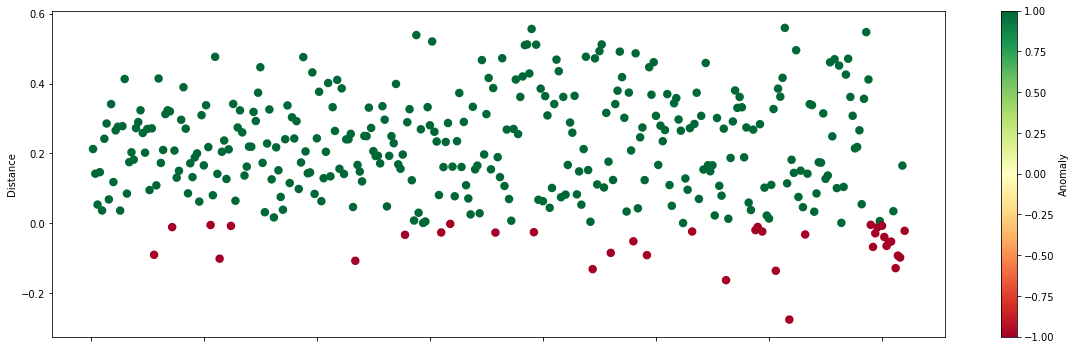

In [29]:
dist.plot.scatter(x='ID', y='Distance', figsize=(20,6),c='Anomaly',lw=4, cmap='RdYlGn')

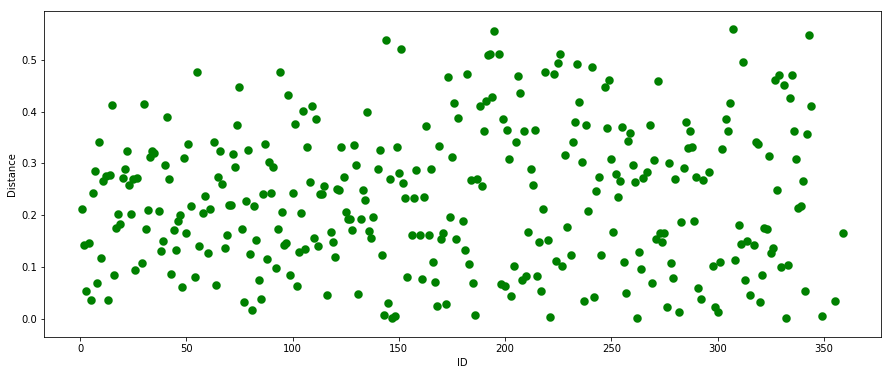

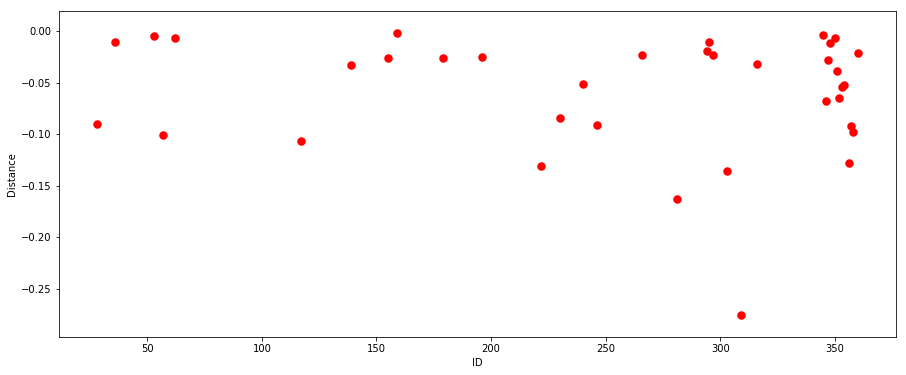

In [30]:
dist.where(dist['Distance']>0).plot.scatter(x='ID', y='Distance', figsize=(15,6), c='green',lw=4)
dist.where(dist['Distance']<0).plot.scatter(x='ID', y='Distance', figsize=(15,6), c='red',lw=4)